<a href="https://colab.research.google.com/github/ryanhuizar/Invasion-Analysis/blob/main/10_2020_VariousInhibitors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
#Load the data 
from google.colab import files 
uploaded = files.upload()

df = pd.read_csv('20201028_VariousInhibitors1.csv')
df.head(7) #give first 7 rows of data 


Saving 20201028_VariousInhibitors1.csv to 20201028_VariousInhibitors1.csv


,Replicate,Date Imaged,Mouse_model,Matrix_comp,Condition,Organoid #,File,invasive_strands,peripheral_cells,Label,Area,Circularity,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-02.czi,2,109,invasive_disseminative,72857.884,0.202,1.498,0.668,0.745,NaN
1,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-03.czi,0,42,invasive_disseminative,101951.363,0.600,NaN,1.527,0.655,0.913
2,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-04.czi,0,201,invasive_disseminative,201831.879,0.689,1.373,0.728,0.912,NaN
3,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-05.czi,0,85,invasive_disseminative,48849.698,0.393,1.374,0.728,0.749,NaN
4,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-06.czi,0,123,invasive_disseminative,79612.923,0.208,1.435,0.697,0.783,NaN
5,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-07.czi,4,56,invasive_disseminative,82692.296,0.242,1.544,0.648,0.710,NaN
6,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-08.czi,4,65,invasive_collective,67711.579,0.228,1.259,0.794,0.585,NaN


In [85]:
print('the shape of the data is ', df.shape)  
print(df.isna().sum()) 

the shape of the data is  (213, 16)
Replicate            51
Date Imaged           0
Mouse_model           0
Matrix_comp           0
Condition             0
Organoid #          213
File                  0
invasive_strands      0
peripheral_cells      0
Label                 0
Area                  1
Circularity           1
Unnamed: 12           2
Unnamed: 13           1
Unnamed: 14           2
Unnamed: 15         211
dtype: int64


In [86]:
#Calculate new column, inverse circularity
df['inverse_circularity'] = (1/df['Circularity'])
df.head()

,Replicate,Date Imaged,Mouse_model,Matrix_comp,Condition,Organoid #,File,invasive_strands,peripheral_cells,Label,Area,Circularity,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,inverse_circularity
0,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-02.czi,2,109,invasive_disseminative,72857.884,0.202,1.498,0.668,0.745,NaN,4.950495
1,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-03.czi,0,42,invasive_disseminative,101951.363,0.600,NaN,1.527,0.655,0.913,1.666667
2,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-04.czi,0,201,invasive_disseminative,201831.879,0.689,1.373,0.728,0.912,NaN,1.451379
3,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-05.czi,0,85,invasive_disseminative,48849.698,0.393,1.374,0.728,0.749,NaN,2.544529
4,1.0,9/30/20,C31TAg,collagen_3mg,Wild-type,NaN,20200930_colI_3mg-06.czi,0,123,invasive_disseminative,79612.923,0.208,1.435,0.697,0.783,NaN,4.807692


AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


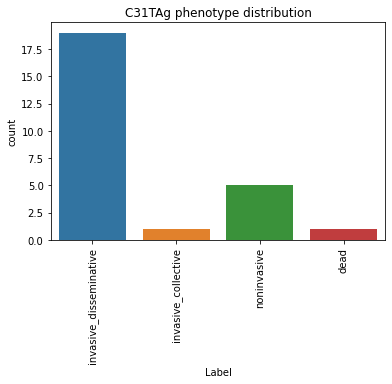

In [87]:
c3 = df[df['Mouse_model'] == 'C31TAg']
pymt = df[df['Mouse_model'] == 'PyMT']

c3_wt = c3[c3['Condition'] == 'Wild-type']
pymt_wt = pymt[pymt['Condition'] == 'Wild-type']


c3_wt.head()
pymt_wt.head()



c3_wt_label_plot = sns.countplot(c3_wt['Label'], label = 'count')
for i in c3_wt_label_plot.get_xticklabels():
  i.set_rotation(90)
  
plt.title('C31TAg phenotype distribution')

print(c3_wt_label_plot) #Obviously need to go through and rename so columns are not misspelled:



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


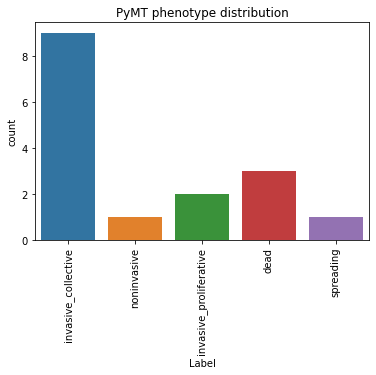

In [88]:
pymt_wt_label_plot = sns.countplot(pymt_wt['Label'], label = 'count')
for i in pymt_wt_label_plot.get_xticklabels():
  i.set_rotation(90)
plt.title('PyMT phenotype distribution')
print(pymt_wt_label_plot)

(array([4., 6., 5., 4., 1., 0., 2., 3., 0., 1.]), array([ 23305.124 ,  45964.8368,  68624.5496,  91284.2624, 113943.9752,
       136603.688 , 159263.4008, 181923.1136, 204582.8264, 227242.5392,
       249902.252 ]), <a list of 10 Patch objects>)


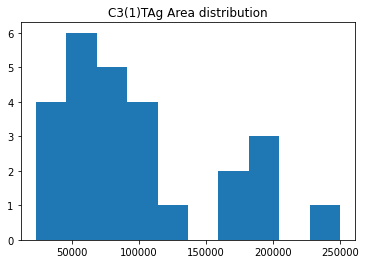

In [89]:
Area_hist_c3_wt = plt.hist(c3_wt['Area'])

plt.title('C3(1)TAg Area distribution')
print(Area_hist_c3_wt)


(array([3., 2., 4., 1., 1., 3., 0., 1., 0., 1.]), array([ 26750.353 ,  45989.8182,  65229.2834,  84468.7486, 103708.2138,
       122947.679 , 142187.1442, 161426.6094, 180666.0746, 199905.5398,
       219145.005 ]), <a list of 10 Patch objects>)


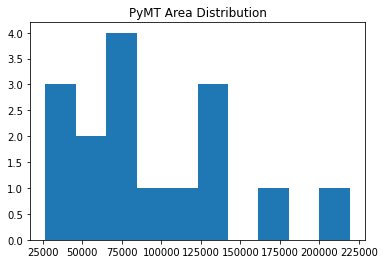

In [90]:
Area_hist_pymt_wt = plt.hist(pymt_wt['Area'])
plt.title('PyMT Area Distribution')
print(Area_hist_pymt_wt)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


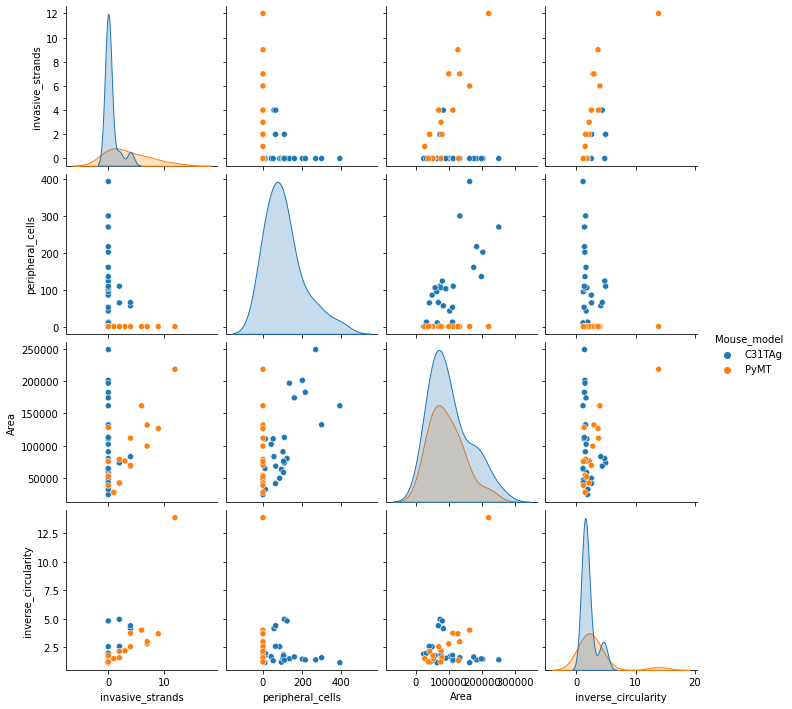

In [91]:
#pairplot of variables in wt data: 
sns.pairplot(wild_type, 
             hue='Mouse_model', 
             vars=['invasive_strands', 'peripheral_cells', 'Area', 'inverse_circularity'])

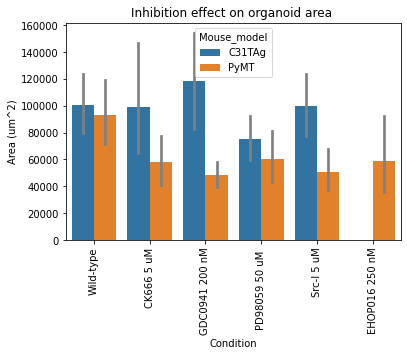

In [92]:
#Create boxplot  for area vs dose curve. 
#sns.stripplot(x = 'Condition', y = 'Area', data = df, orient = 'v', color = 'black')
inhibitor_area= sns.barplot(x = 'Condition', y = 'Area', data = df, orient = 'v', errcolor = 'gray', hue = 'Mouse_model')
plt.title('Inhibition effect on organoid area ')
#plt.xlabel('EHOP016 Concentration (nM)')
plt.ylabel('Area (um^2)')
for i in inhibitor_area.get_xticklabels():
  i.set_rotation(90)

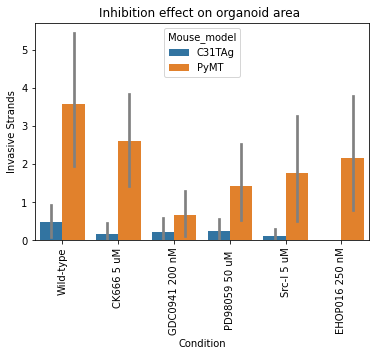

In [94]:
#Create boxplot  for invasive_strands
#sns.stripplot(x = 'Condition', y = 'Area', data = df, orient = 'v', color = 'black')
inhibitor_area= sns.barplot(x = 'Condition', y = 'invasive_strands', data = df, orient = 'v', errcolor = 'gray', hue = 'Mouse_model')
plt.title('Inhibition effect on organoid area ')
#plt.xlabel('EHOP016 Concentration (nM)')
plt.ylabel('Invasive Strands')
for i in inhibitor_area.get_xticklabels():
  i.set_rotation(90)

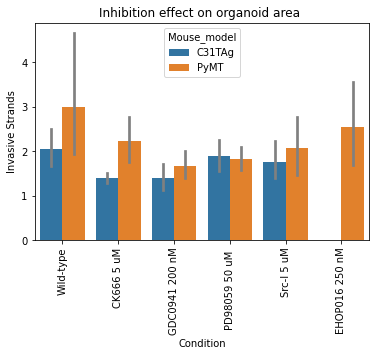

In [95]:
#Create boxplot  for inverse_circularity 
#sns.stripplot(x = 'Condition', y = 'Area', data = df, orient = 'v', color = 'black')
inhibitor_area= sns.barplot(x = 'Condition', y = 'inverse_circularity', data = df, orient = 'v', errcolor = 'gray', hue = 'Mouse_model')
plt.title('Inhibition effect on organoid area ')
#plt.xlabel('EHOP016 Concentration (nM)')
plt.ylabel('Invasive Strands')
for i in inhibitor_area.get_xticklabels():
  i.set_rotation(90)

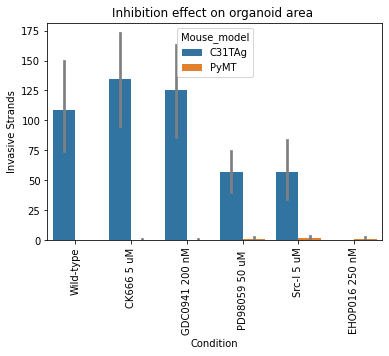

In [96]:
#Create boxplot  for peripheral_cells
#sns.stripplot(x = 'Condition', y = 'Area', data = df, orient = 'v', color = 'black')
inhibitor_area= sns.barplot(x = 'Condition', y = 'peripheral_cells', data = df, orient = 'v', errcolor = 'gray', hue = 'Mouse_model')
plt.title('Inhibition effect on organoid area ')
#plt.xlabel('EHOP016 Concentration (nM)')
plt.ylabel('Invasive Strands')
for i in inhibitor_area.get_xticklabels():
  i.set_rotation(90)